In [16]:
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Prepare the Data

In [3]:
# Loading the preprocessed myopia dataset
file_path = Path("Resources/myopia.csv")
df_myopia = pd.read_csv(file_path)
df_myopia.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [6]:
#Drop the "MYOPIC" column
df_myopia_new=df_myopia.drop("MYOPIC", axis=1)
df_myopia_new.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [8]:
# check for null values
df_myopia_new.isnull().sum()

AGE          0
SPHEQ        0
AL           0
ACD          0
LT           0
VCD          0
SPORTHR      0
READHR       0
COMPHR       0
STUDYHR      0
TVHR         0
DIOPTERHR    0
MOMMY        0
DADMY        0
dtype: int64

In [12]:
df_myopia_new.var()

AGE            0.508298
SPHEQ          0.391774
AL             0.462592
ACD            0.053081
LT             0.023876
VCD            0.441139
SPORTHR       63.493743
READHR         9.413794
COMPHR         9.342242
STUDYHR        4.911575
TVHR          32.707201
DIOPTERHR    257.015890
MOMMY          0.250363
DADMY          0.250403
dtype: float64

In [7]:
# Standarize data with StandarScaler
myopia_scaled = StandardScaler().fit_transform(df_myopia_new)
print(myopia_scaled[0:5])

[[-0.42021911 -1.3639169  -0.89286146  0.48378402 -0.28144315 -1.0197916
   4.1506609   1.69744958 -0.68931054 -0.67299591  0.18405806  0.49830393
   0.98713773  1.0032415 ]
 [-0.42021911 -0.30861224 -0.1718398   0.53591028 -0.96799728 -0.13076253
  -0.99889822 -0.91206246 -0.36187479 -0.22140908 -0.34093217 -0.87508755
   0.98713773  1.0032415 ]
 [-0.42021911  0.60438629 -0.00997682 -0.5066285  -0.17781207  0.21580879
   0.25709181 -0.91206246 -0.03443904 -0.67299591  0.18405806 -0.75023378
  -1.01302987 -0.99676897]
 [-0.42021911 -0.4413248  -0.43670267  1.23093648  0.4569273  -0.97458715
   0.75948782  2.6760166  -0.68931054 -0.67299591 -0.86592239  0.68558458
  -1.01302987  1.0032415 ]
 [-1.82397807 -0.16630592  1.16720365  0.42296952 -0.56642745  1.18017813
   0.25709181 -0.91206246 -0.68931054 -0.67299591 -0.86592239 -1.37450264
   0.98713773 -0.99676897]]


# Apply Dimensionality Reduction

In [14]:
#PCA(n_components=0.99)
# preserve 90% of the explained variance in dimensionality reduction.

# Initialize PCA model
pca = PCA(n_components=0.99,)

# Get the principal components
myopia_pca = pca.fit_transform(myopia_scaled)

In [31]:
#Further reduce the dataset dimensions with t-SNE and visually inspect the results. 
#To do this, run t-SNE on the principal components, which is the output of the PCA transformation.
tsne = TSNE(learning_rate=35,n_components=3)

# Reduce dimensions
tsne_features = tsne.fit_transform(myopia_pca)


C:\Users\elama\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [32]:
#To check the reduction in dimensionality
tsne_features.shape

(618, 3)

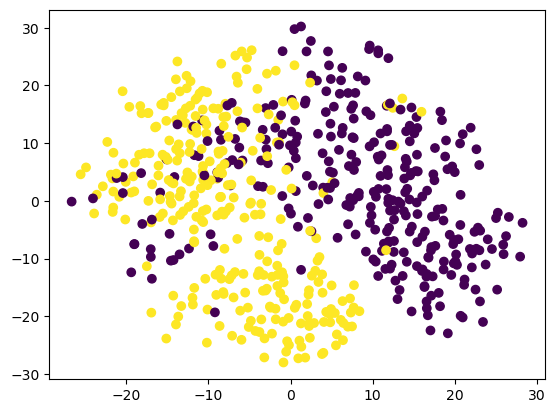

In [40]:
# scatter plot the data
plt.scatter(tsne_features[:,0],tsne_features[:,1],c=df_myopia_new["DADMY"])

In [38]:
labels.value_counts()


NameError: name 'labels' is not defined